# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Create lists for latitude, longitude, temp (F), humidity(%), cloudiness(%), wind speed (mph)
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []
cities_final = []

count = 1
sets = 1

# Loop through the list of cities and perform a request for data on each, catch exceptions
print(f'Beginning Data Retrieval \n -----------------------')
for city in cities:
    try:
        print(f'Processing Record {count} of Set {sets} | {city}' )
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_final.append(city)
        count = count + 1
    except KeyError:
        print(f'City not found. Skipping . . .')
    if count == 51: # create sets
        sets = sets + 1
        count = 1 #reset count
        
print(f' ---------------------------- \n Data Retrieval Complete \n ----------------------------')

Beginning Data Retrieval 
 -----------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | garowe
Processing Record 3 of Set 1 | jilmah
City not found. Skipping . . .
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | lucea
Processing Record 8 of Set 1 | quirinopolis
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping . . .
Processing Record 9 of Set 1 | nelson bay
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | falmouth
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | santa lucia
Processing Record 17 of Set 1 | kloulklubed
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 |

Processing Record 19 of Set 4 | guerrero negro
Processing Record 20 of Set 4 | sitka
Processing Record 21 of Set 4 | port macquarie
Processing Record 22 of Set 4 | rocha
Processing Record 23 of Set 4 | codrington
Processing Record 24 of Set 4 | torbay
Processing Record 25 of Set 4 | port hedland
Processing Record 26 of Set 4 | grindavik
Processing Record 27 of Set 4 | chara
Processing Record 28 of Set 4 | artesia
Processing Record 29 of Set 4 | east london
Processing Record 30 of Set 4 | tuatapere
Processing Record 31 of Set 4 | chernyshevskiy
Processing Record 32 of Set 4 | independence
Processing Record 33 of Set 4 | chapais
Processing Record 34 of Set 4 | saint-georges
Processing Record 35 of Set 4 | ugoofaaru
Processing Record 36 of Set 4 | lompoc
Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | dalinghe
City not found. Skipping . . .
Processing Record 38 of Set 4 | impfondo
Processing Record 39 of Set 4 | altay
Processing Record 40 of Set 4 | pachino


Processing Record 30 of Set 7 | yangambi
Processing Record 31 of Set 7 | huarmey
Processing Record 32 of Set 7 | phetchaburi
Processing Record 33 of Set 7 | vilcun
Processing Record 34 of Set 7 | camana
Processing Record 35 of Set 7 | maniitsoq
Processing Record 36 of Set 7 | nara
Processing Record 37 of Set 7 | airai
Processing Record 38 of Set 7 | ust-nera
Processing Record 39 of Set 7 | marzuq
Processing Record 40 of Set 7 | yulara
Processing Record 41 of Set 7 | san patricio
Processing Record 42 of Set 7 | taburi
City not found. Skipping . . .
Processing Record 42 of Set 7 | phan thiet
Processing Record 43 of Set 7 | key largo
Processing Record 44 of Set 7 | vaitupu
City not found. Skipping . . .
Processing Record 44 of Set 7 | takoradi
Processing Record 45 of Set 7 | tarakan
Processing Record 46 of Set 7 | baykit
Processing Record 47 of Set 7 | mullaitivu
City not found. Skipping . . .
Processing Record 47 of Set 7 | flin flon
Processing Record 48 of Set 7 | deputatskiy
Processing

Processing Record 49 of Set 10 | taoudenni
Processing Record 50 of Set 10 | kahuta
Processing Record 1 of Set 11 | jawa
Processing Record 2 of Set 11 | seljord
Processing Record 3 of Set 11 | saint-francois
Processing Record 4 of Set 11 | magaria
Processing Record 5 of Set 11 | ulaangom
Processing Record 6 of Set 11 | kuche
City not found. Skipping . . .
Processing Record 6 of Set 11 | rio gallegos
Processing Record 7 of Set 11 | bagdarin
Processing Record 8 of Set 11 | manaure
Processing Record 9 of Set 11 | scottsburgh
City not found. Skipping . . .
Processing Record 9 of Set 11 | san andres
Processing Record 10 of Set 11 | alyangula
Processing Record 11 of Set 11 | mrirt
City not found. Skipping . . .
Processing Record 11 of Set 11 | zharkovskiy
Processing Record 12 of Set 11 | sibolga
Processing Record 13 of Set 11 | barra
Processing Record 14 of Set 11 | komsomolskiy
Processing Record 15 of Set 11 | phibun mangsahan
Processing Record 16 of Set 11 | gobo
Processing Record 17 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
#create dictionary
city_dict = {
    "City": cities_final,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
#convert to pandas dataframe
city_df = pd.DataFrame(city_dict)
#export to csv
city_df.to_csv("output_data/cities.csv", index=False)

#display dataframe
city_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5000,32.76,98,100,19.98,RU,1619220976
1,garowe,8.4054,48.4845,77.23,73,65,9.57,SO,1619220976
2,bredasdorp,-34.5322,20.0403,50.00,93,92,4.61,ZA,1619221196
3,esperance,-33.8667,121.9000,55.40,88,98,9.22,AU,1619220977
4,yellowknife,62.4560,-114.3525,17.01,57,75,10.36,CA,1619221313
5,kapaa,22.0752,-159.3190,80.60,61,75,14.97,US,1619220977
6,lucea,18.4510,-78.1736,82.40,74,20,10.36,JM,1619220977
7,quirinopolis,-18.4483,-50.4517,69.44,36,0,0.87,BR,1619220977
8,nelson bay,-32.7167,152.1500,61.00,72,98,13.80,AU,1619220978
9,ushuaia,-54.8000,-68.3000,41.00,93,75,5.75,AR,1619220747


In [17]:
#summary stats
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,5.360000e+02
mean,19.903357,20.681267,59.725299,69.703358,52.458955,7.943041,1.619221e+09
std,33.636628,89.714152,19.399982,22.523086,37.233968,5.346525,1.258650e+02
min,-54.800000,-179.166700,6.100000,6.000000,0.000000,0.430000,1.619221e+09
25%,-8.675550,-58.931775,44.600000,59.000000,19.750000,3.755000,1.619221e+09
50%,21.478900,24.664450,62.010000,75.000000,53.000000,6.910000,1.619221e+09
75%,47.932175,100.707400,77.000000,87.000000,90.000000,11.020000,1.619221e+09
max,78.218600,179.316700,91.990000,100.000000,100.000000,32.390000,1.619221e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
print(city_df[city_df['Humidity']>100])
print(f'The maximum humidity measure in the dataset is {max(city_df["Humidity"])}')

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []
The maximum humidity measure in the dataset is 100


In [17]:
#  Get the indices of cities that have humidity over 100%.
# skip

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# skip

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

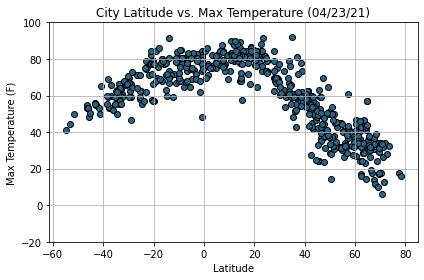

In [35]:
#scatterplot latitude vs. max temp
x_values = city_df['Lat']
y_values = city_df['Max Temp']
y_ticks = np.arange(-20, 120, 20)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Max Temperature (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_maxtemp.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

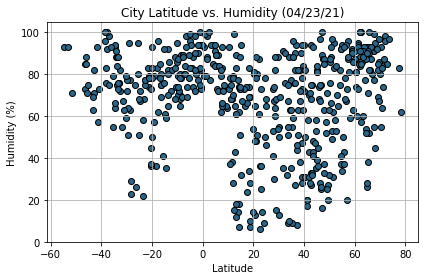

In [36]:
#scatterplot latitude vs. humidity
x_values = city_df['Lat']
y_values = city_df['Humidity']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Humidity (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_humidity.png")

#show plot
plt.show()

## Latitude vs. Cloudiness Plot

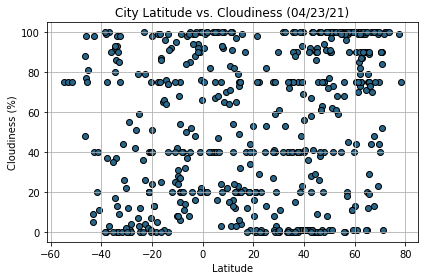

In [37]:
#scatterplot latitude vs. humidity
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Cloudiness (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_cloudiness.png")

#show plot
plt.show()

## Latitude vs. Wind Speed Plot

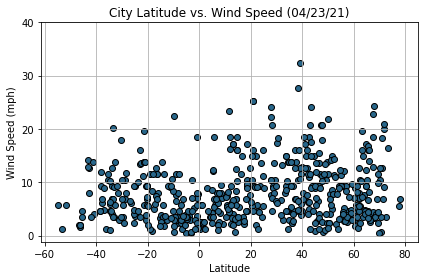

In [40]:
#scatterplot latitude vs. humidity
x_values = city_df['Lat']
y_values = city_df['Wind Speed']
y_ticks = np.arange(0, 50, 10)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Wind Speed (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_cloudiness.png")

#show plot
plt.show()

## Linear Regression

In [45]:
#separate into northern and southern hemispheres
northern_df = city_df[city_df['Lat'] >= 0]
southern_df = city_df[city_df['Lat'] < 0 ]

####  Northern Hemisphere - Latitude vs. Max Temp Linear Regression 

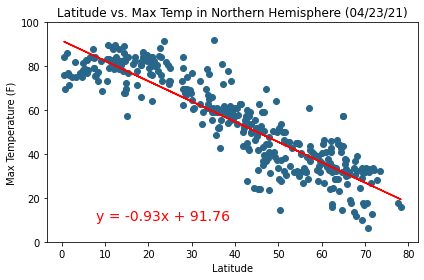

The r-value is: -0.8985790036022908


In [60]:
#scatterplot latitude vs. max temp
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Max Temp in Northern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (8,10), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_maxtemp_regress.png")

#show plot
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Latitude vs. Max Temp Linear Regression

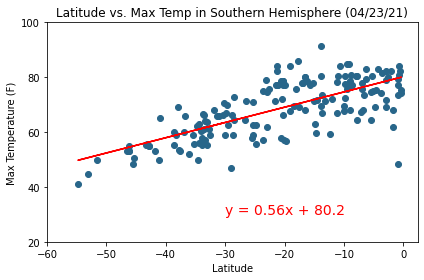

The r-value is: 0.7247538841567264


In [61]:
#scatterplot latitude vs. max temp
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
y_ticks = np.arange(20, 120, 20)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Max Temp in Southern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-30,30), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_maxtemp_regress.png")

#show plot
plt.show()
print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Latitude vs. Humidity (%) Linear Regression

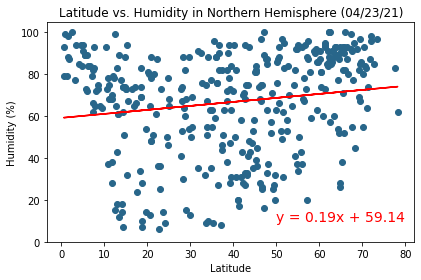

The r-value is: 0.15971395832119223


In [65]:
#scatterplot latitude vs. humidity
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Humidity in Northern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (50,10), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_humidity_regress.png")

#show plot
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Latitude vs. Humidity (%) Linear Regression

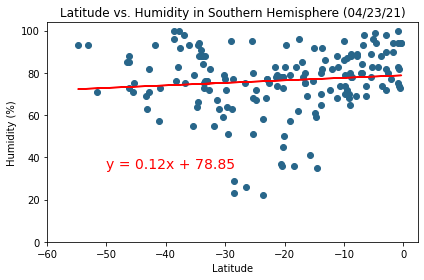

The r-value is: 0.10439922070042819


In [68]:
#scatterplot latitude vs. humidity
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Humidity in Southern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-50,35), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_humidity_regress.png")

#show plot
plt.show()
print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

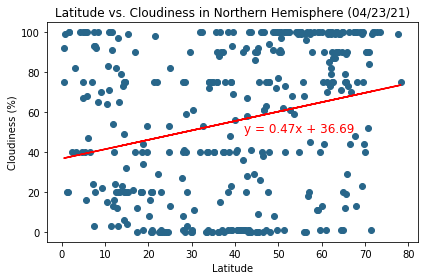

The r-value is: 0.25851957909655743


In [73]:
#scatterplot latitude vs. cloudiness
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Cloudiness in Northern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (42,50), fontsize=12, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_cloudiness_regress.png")

#show plot
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

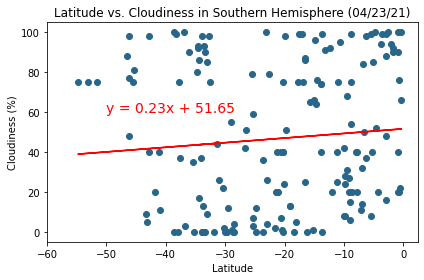

The r-value is: 0.08722602866033276


In [75]:
#scatterplot latitude vs. cloudiness
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Cloudiness in Southern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-50,60), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_cloudiness_regress.png")

#show plot
plt.show()
print(f'The r-value is: {rvalue}')

####  Northern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

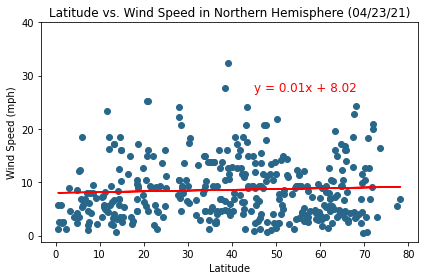

The r-value is: 0.05215601251747199


In [78]:
#scatterplot latitude vs. wind speed
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
y_ticks = np.arange(0, 50, 10)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Wind Speed in Northern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (45,27), fontsize=12, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_wind_regress.png")

#show plot
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

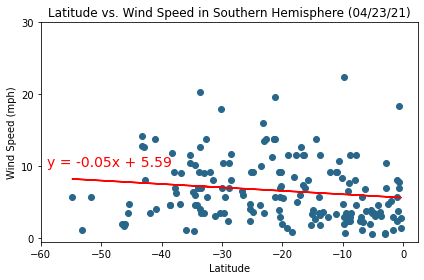

The r-value is: -0.14827481321846642


In [83]:
#scatterplot latitude vs. wind speed
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
y_ticks = np.arange(0, 40, 10)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Wind Speed in Southern Hemisphere (04/23/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-59,10), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_wind_regress.png")

#show plot
plt.show()
print(f'The r-value is: {rvalue}')